In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/house_prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## Clean data

In [4]:
df.isnull().sum().sum()

6965

In [5]:
col_wn = df.columns[df.isnull().any()]
col_wn

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
for i in col_wn:
    print(f'{i}: {df[i].isnull().sum()}')

LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


In [7]:
# Drop values with many nulls
for i in col_wn:
    if df[i].isnull().sum() > 100:
        df.drop(i, axis=1, inplace=True)
df.shape

(1460, 75)

In [8]:
df.loc[:, df.isnull().any()].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

### Clean nulls object values

In [9]:
df.loc[:, df.isnull().any()].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [10]:
ob_wn = df.loc[:, df.isnull().any()].select_dtypes(include='object')
ob_wn.head(2)

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA


In [11]:
for i in ob_wn.keys():
    print(i, df[i].unique())

MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [12]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')

df.drop('BsmtFinType2', axis=1, inplace=True)
df.drop(df.loc[df['Electrical'].isnull()].index, inplace=True)
df.drop('GarageCond', axis=1, inplace=True)

df.isnull().sum().sum()

89

### Clean nulls numeric values

In [13]:
df.loc[:, df.isnull().any()].isnull().sum()

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [14]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df.drop('GarageYrBlt', axis=1, inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
df.shape

(1459, 72)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.duplicated().sum()

0

## One hot encoding

In [18]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

In [19]:
cat = pd.get_dummies(cat)
cat.shape

(1459, 230)

## Correlated values

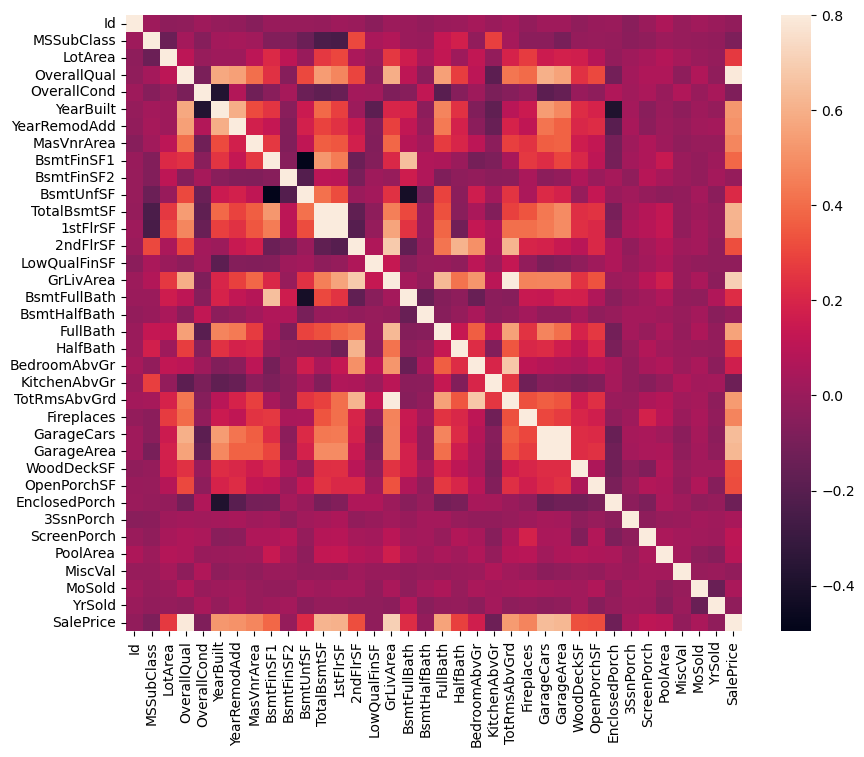

In [20]:
corr = num.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=.8, square=True);

In [21]:
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr['SalePrice'][:'YearRemodAdd']

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64

In [22]:
num = num[corr['SalePrice'][:'YearRemodAdd'].keys().values]
num.shape

(1459, 11)

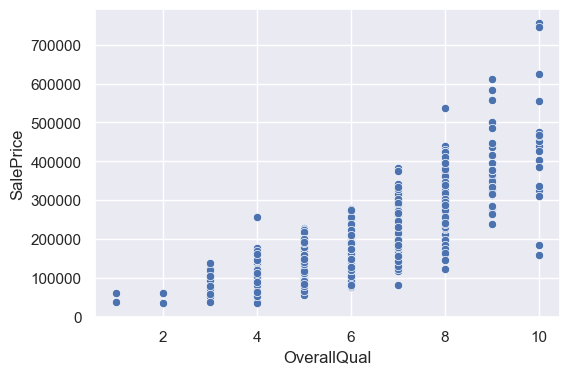

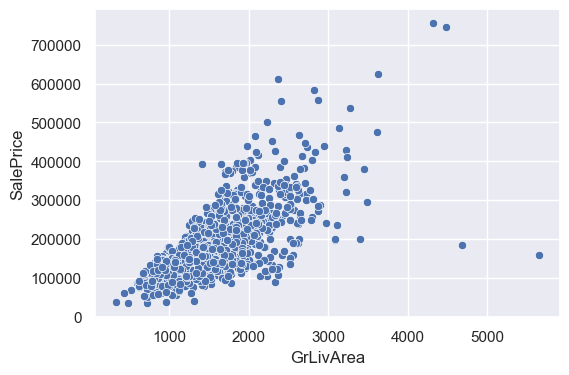

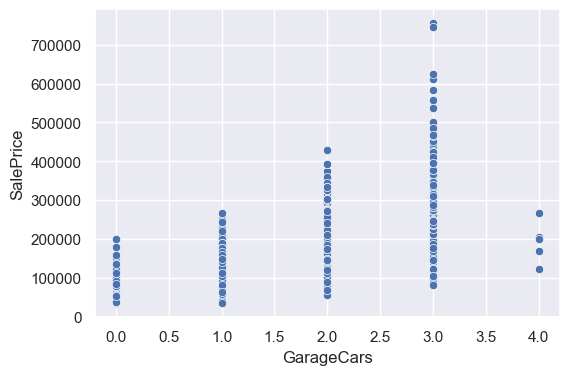

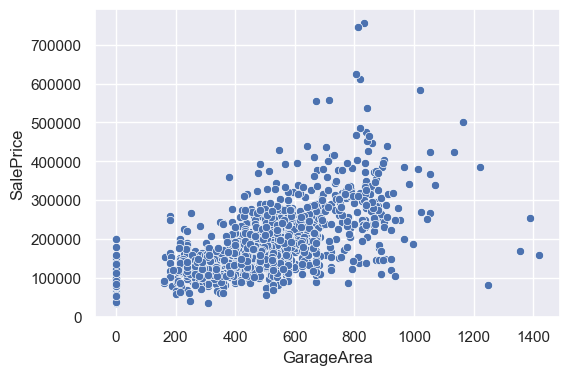

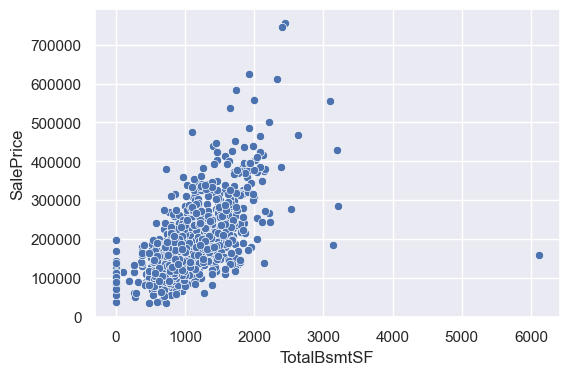

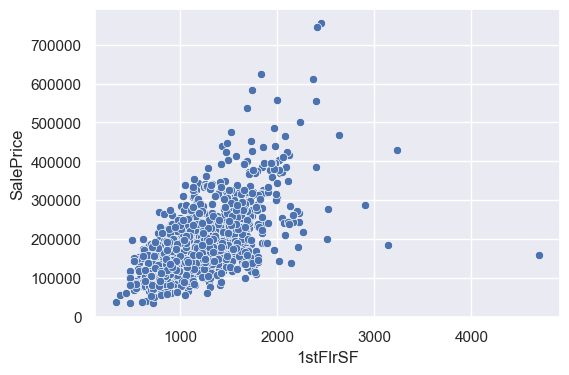

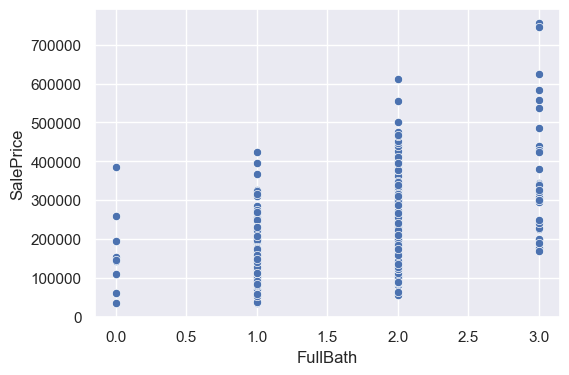

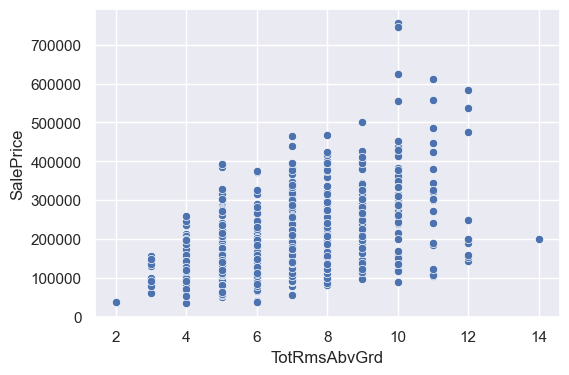

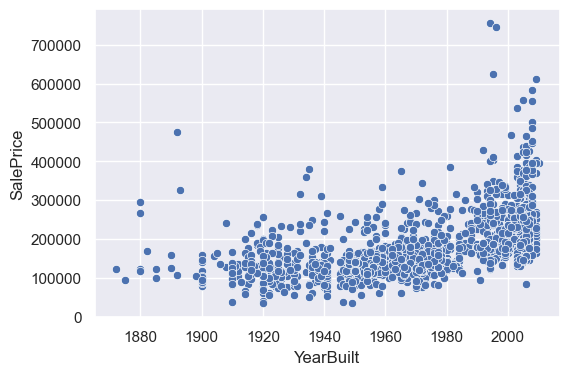

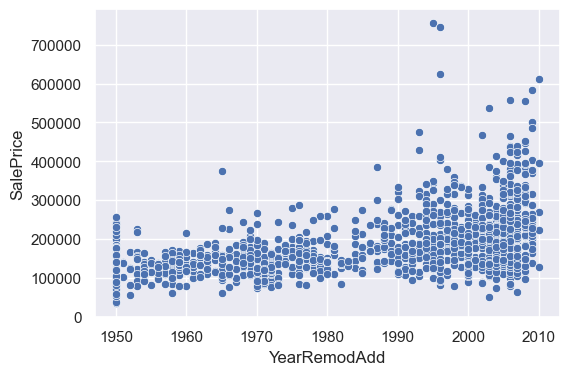

In [23]:
sns.set_theme()

for i in range(1, num.shape[1]):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(num, x=num.columns[i], y=num['SalePrice'])
    plt.show();

### Clean outliers

In [24]:
from scipy.stats import skew

skewness = num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
num[skewed_features] = np.log1p(num[skewed_features])

In [25]:
num.shape

(1459, 11)

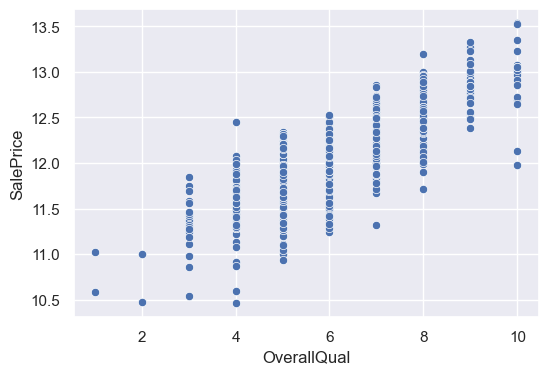

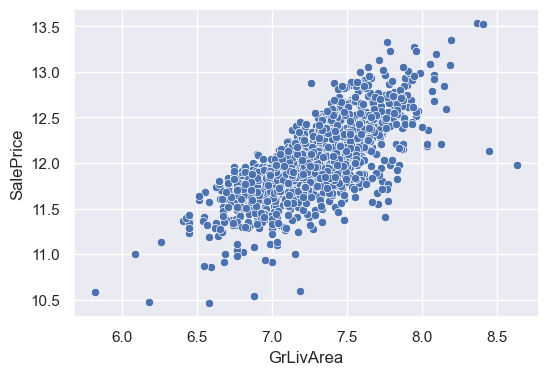

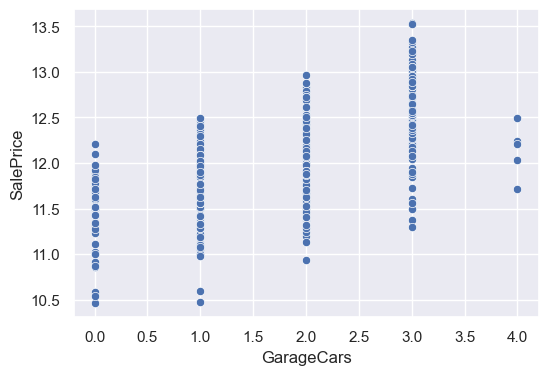

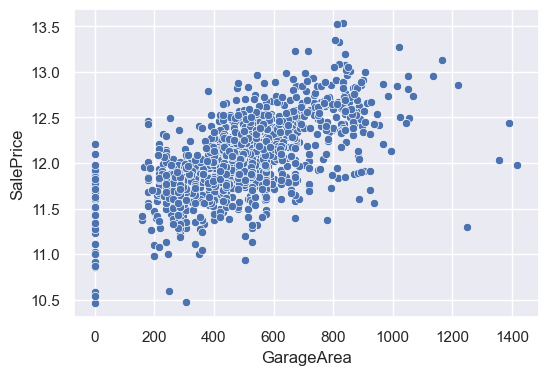

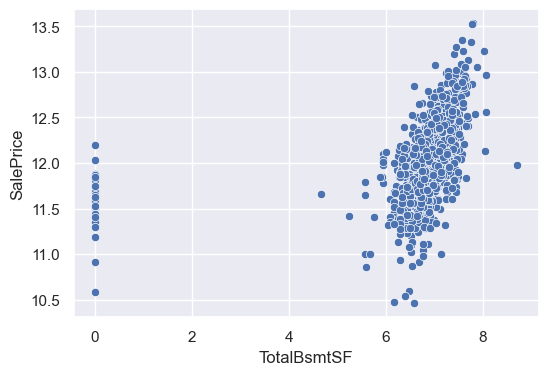

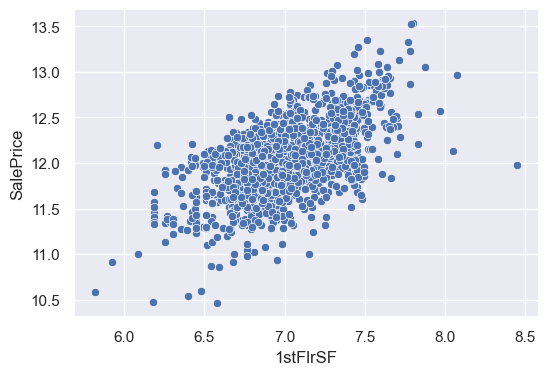

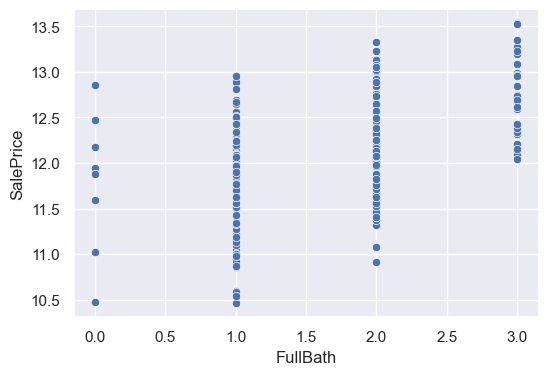

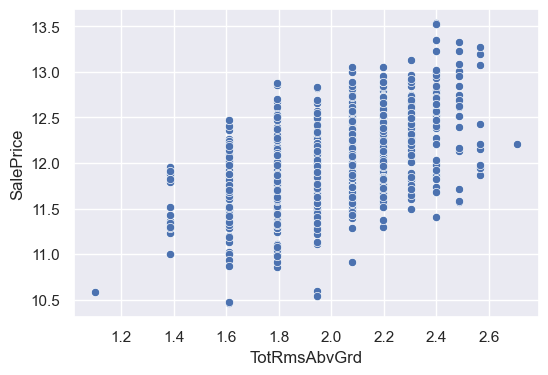

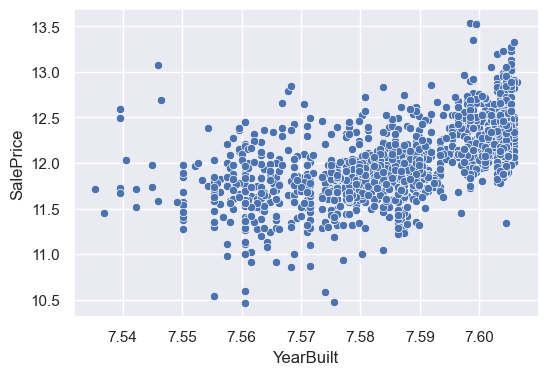

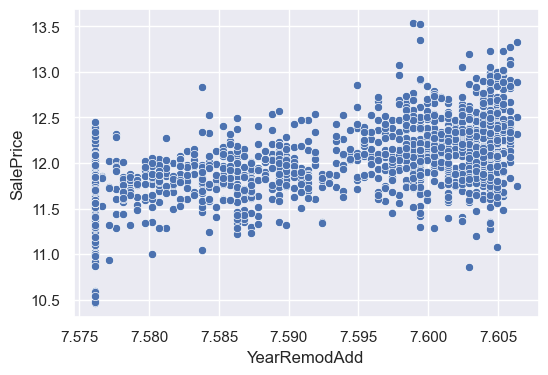

In [26]:
for i in range(1, num.shape[1]):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(num, x=num.columns[i], y=num['SalePrice'])
    plt.show();

In [27]:
df = pd.concat([num, cat], axis=1)
df.shape

(1459, 241)

## Models testing

In [28]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [31]:
models = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'lasso': {
        'model': Lasso(max_iter=3000),
        'params': {
            'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3],
            'tol': [0.001, 0.01, 0.1, 0.3, 1, 3]
        }
    },
    'ridge': {
        'model': Ridge(max_iter=3000),
        'params': {
            'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 15, 30, 50],
            'tol': [0.001, 0.01, 0.1, 0.3, 1, 3]
        }
    },
    'elastic_net': {
        'model': ElasticNet(max_iter=50000),
        'params': {
            'l1_ratio' : [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
            'alpha' : [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6]}
    }
    
}

In [32]:
scores = []

for model, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False, error_score='raise')
    clf.fit(X, y)
    scores.append({
        'model': model,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })

In [33]:
best_models = pd.DataFrame(scores)
best_models

,model,best_score,best_params
0,linear_regression,0.877585,{}
1,lasso,0.822562,"{'alpha': 0.01, 'tol': 0.1}"
2,ridge,0.886634,"{'alpha': 6, 'tol': 0.001}"
3,elastic_net,0.890728,"{'alpha': 0.0006, 'l1_ratio': 0.6}"


### Testing best model

In [34]:
model = ElasticNet(max_iter=50000, alpha=0.0006, l1_ratio=0.6)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(mean_squared_error(y, model.predict(X)))

0.902704933290212
0.013204637510968871


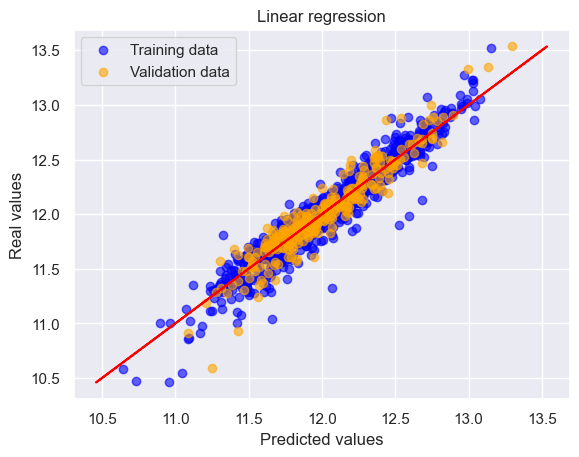

In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", label = "Training data", alpha=0.6)
plt.scatter(y_test_pred, y_test, c = "orange", label = "Validation data", alpha=0.6)
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot(y, y, c = "red")
plt.show()

In [36]:
model.fit(X, y)

ElasticNet(alpha=0.0006, l1_ratio=0.6, max_iter=50000)

### Export model

In [37]:
import pickle
with open('house_prices_model', 'wb') as  f: 
    pickle.dump(model, f)

In [38]:
X.shape

(1459, 240)

In [39]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,7.444833,2,548,6.753438,6.753438,2,2.197225,7.602900,7.602900,...,0,0,0,1,0,0,0,0,1,0
1,6,7.141245,2,460,7.141245,7.141245,2,1.945910,7.589336,7.589336,...,0,0,0,1,0,0,0,0,1,0
2,7,7.488294,2,608,6.825460,6.825460,2,1.945910,7.601902,7.602401,...,0,0,0,1,0,0,0,0,1,0
3,7,7.448916,3,642,6.629363,6.869014,1,2.079442,7.557995,7.586296,...,0,0,0,1,1,0,0,0,0,0
4,8,7.695758,3,836,7.044033,7.044033,2,2.302585,7.601402,7.601402,...,0,0,0,1,0,0,0,0,1,0


In [40]:
X.to_csv('inputs_house_prices.csv', index=False)